# Assignment -13 K-Nearest Neighbor 

### Prepare a model for glass classification using KNN

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
X = df.drop(['Type'], axis=1)

y = df['Type']

In [6]:
#Prepare data for classification process
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
#to find best k value
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(x_train,y_train)
    train_acc=np.mean(neigh.predict(x_train)==y_train)
    test_acc=np.mean(neigh.predict(x_test)==y_test)
    acc.append([train_acc,test_acc])

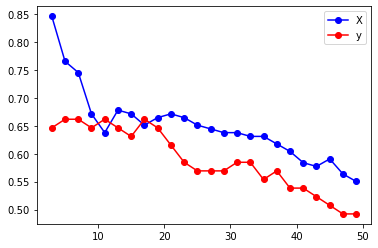

In [8]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['X','y'])

In [10]:
#Create a model
KNN_Classifier = KNC(n_neighbors =6, p = 2, metric='minkowski')

In [11]:
KNN_Classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [12]:
y_test_pred = KNN_Classifier.predict(x_test)

In [13]:
#check the accuracy of your predicted classifier
acc = accuracy_score(y_test, y_test_pred)
acc

0.676923076923077